# Introductory Exercises for Finance

This notebook is based on *Financial Risk Forecasting: The Theory and Practice of Forecasting Market Risk with Implementation in R and Matlab* by **Jon Danielsson**.

## Objective

The primary goal of this work is to build a foundation for roles in **Quantitative Trading** or **Quantitative Research**, particularly on the **buy-side**. These roles demand a strong grasp of financial modeling, risk estimation, and signal generation.

While proficiency in C++ is often encouraged for production environments, this note focuses on **Python**, which remains the dominant language for research, prototyping, and data analysis in quantitative finance.

## Focus Areas

We'll develop a hands-on understanding of key time-series models and risk metrics, with simple implementations of:

- **APARCH** – Asymmetric Power ARCH model  
- **GARCH($L_1, L_2$)** – Generalized Autoregressive Conditional Heteroskedasticity  
- **ARIMA** – Autoregressive Integrated Moving Average  
- **EWMA** – Exponentially Weighted Moving Average  
- **MA** – Moving Average  
- **VaR** – Value at Risk  
- **ES** – Expected Shortfall  

## Broader Context

Quantitative roles in finance revolve around identifying **alpha signals**—persistent statistical patterns in market data that can be exploited for profitable trading strategies. This involves:

- Ingesting and preprocessing large datasets  
- Exploring and validating statistical features  
- Building and testing models that reflect underlying market inefficiencies  

In this notebook, we will begin exploring how to:

- Access and analyze financial market data using Python  
- Estimate and forecast risk  
- Lay the groundwork for alpha generation through statistical modeling*

> This is a practical and exploratory note—a first step into the intersection of data science, financial engineering, and market microstructure.


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To instal finance run
# pip install yfinance
# pip install statsmodels

# Download S&P 500 data from 2000-01-01 to 2009-12-31
sp500 = yf.download('^GSPC', start='2000-01-01', end='2009-12-31')

# Show first few rows
print(sp500.head())

# Optional: save to CSV
sp500.to_csv('sp500_2000_2009.csv')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   931800000
2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971  1009000000
2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044  1085500000
2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985  1092300000
2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951  1225200000


# Chapter 1: Returns

In this chapter, we begin with a hands-on exploration of historical stock returns. Specifically, we will use Python's `yfinance` library to retrieve market data for the **S&P 500** over the period **2000–2010**.

## Objectives

- Load historical market data from Yahoo Finance  
- Calculate and visualize **returns**  
- Compute and interpret the **statistical moments** of the return distribution  
- Perform basic **time-series diagnostics**  

## Statistical Summary of Returns

For the S&P 500 index, we will calculate the following key metrics:

- **Mean**: Average return, indicating the central tendency of the distribution  
- **Standard Deviation**: Measures volatility; how much returns deviate from the mean  
- **Minimum & Maximum**: The lowest and highest daily returns in the sample  
- **Skewness**: Indicates asymmetry; negative skew implies more extreme negative returns  
- **Kurtosis**: Measures tail heaviness; high kurtosis implies fat tails and outlier sensitivity  
- **Autocorrelation (lag 1)** of returns (**ACF(y)**): Detects linear dependence between consecutive returns  
- **Autocorrelation (lag 1)** of squared returns (**ACF(y²)**): Captures volatility clustering  
- **Jarque-Bera Test**: A formal test for normality using skewness and kurtosis

These metrics are essential in risk modeling and form the foundation for more advanced volatility forecasting methods. All of the functions implemented in `numpy`

### S&P 500 Adjusted Closing Price & Returns (2000–2009)

The adjusted price is important because it accounts for corporate actions such as stock splits and dividend payouts, providing a more accurate reflection of the stock's true historical performance.

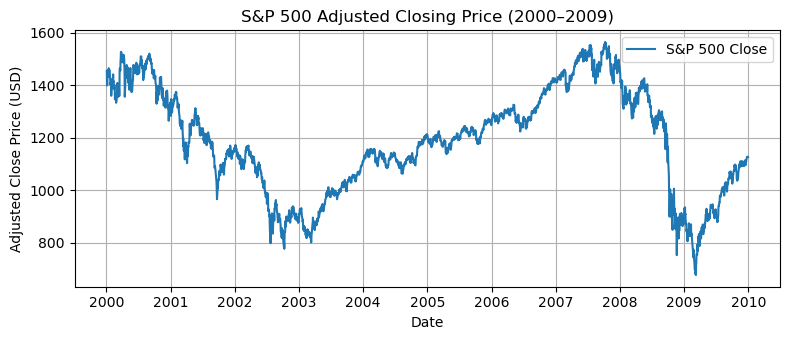

In [2]:
# Plot adjusted close over time
plt.figure(figsize=(8, 3.5))
plt.plot(sp500.index, sp500['Close'], label='S&P 500 Close')

# Get first 5 days
# A = sp500['Close']
# print(A.index[:5])  
# value = sp500['Close'].loc['2005-06-15']
# print(value[0])

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.title('S&P 500 Adjusted Closing Price (2000–2009)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

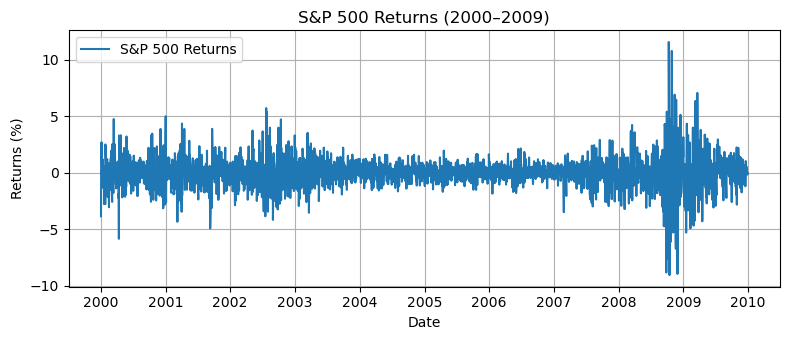

In [3]:
close_array = sp500['Close'].values.flatten()

returns = np.diff(close_array) / close_array[:-1]

plt.figure(figsize=(8, 3.5))
plt.plot(sp500.index[:-1], 100*returns, label='S&P 500 Returns')

plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.title('S&P 500 Returns (2000–2009)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Basic moments

In [4]:
import numpy as np
from scipy.stats import skew, kurtosis, jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming y is a numpy array or a list of data points

# Mean
mean_SaP = np.mean(returns)
# Standard deviation
std_SaP = np.std(returns)
# Min
min_SaP = np.min(returns)
# Max
max_SaP = np.max(returns)
# Skewness
skew_SaP = skew(returns)
# Kurtosis
kurt_SaP = kurtosis(returns)

# Autocorrelation (lag 1) for y
def sacf(y, lag):
    acf = np.corrcoef(y[:-lag], y[lag:])[0, 1]  # Autocorrelation of lag
    return acf

acf_SaP = sacf(returns, 1)

# Autocorrelation (lag 1) for y^2
acf_SaP_squared = sacf(np.square(returns), 1)
# Jarque-Bera test
jb_stat, jb_pval = jarque_bera(returns)

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
# Print results
print(color.BOLD + 'S&P 500 moment from 2000 to 2009' + color.END)
print(f'Mean: {100*mean_SaP} %')
print(f'Standard Deviation: {100*std_SaP} %')
print(f'Min: {100*min_SaP} %')
print(f'Max: {100*max_SaP} %')
print(f'Skewness: {skew_SaP}')
print(f'Kurtosis: {kurt_SaP}')
print(f'ACF (lag 1) for y: {100*acf_SaP} %')
print(f'ACF (lag 1) for y^2: {100*acf_SaP_squared} %')
print(f'Jarque-Bera Test: Stat = {jb_stat}, p-value = {100*jb_pval} %')

S&P 500 moment from 2000 to 2009
Mean: -0.00038660409279602203 %
Standard Deviation: 1.4002574512443813 %
Min: -9.034977808622578 %
Max: 11.580036951513694 %
Skewness: 0.09948007746030324
Kurtosis: 7.853638663417037
ACF (lag 1) for y: -8.83824851502897 %
ACF (lag 1) for y^2: 18.738961005242093 %
Jarque-Bera Test: Stat = 6462.517226129015, p-value = 0.0 %


### S&P 500 Volatility

Volatility si the standard deviation of returns. The Volatility is computed as

$\sigma_{\rm annual} = \sigma_{\rm period} \sqrt{\rm periods ~per ~year}$. So annualised volatility always goes with $\sqrt{252}$

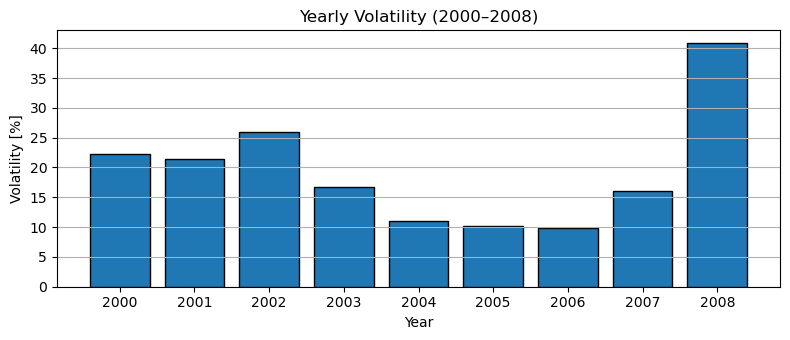

In [5]:
# Compute the returns and volatility per year
N_years = 9
year_vol = np.zeros(N_years,)
for i in range(N_years):
    start_date = "".join(("200", str(i),"-01-01"))
    end_date = "".join(("200", str(i+1),"-01-01"))
    values_close = sp500['Close'].loc[start_date:end_date].values.flatten()
    year_return = np.diff(values_close) / values_close[:-1]
    year_vol[i] = 100*np.std(year_return) * np.sqrt(252)  # annualized daily volatility

years = ["200" + str(i) for i in range(N_years)]
# Plot chart
plt.figure(figsize=(8, 3.5))
plt.bar(years, year_vol, edgecolor='black')
plt.title('Yearly Volatility (2000–2008)')
plt.xlabel('Year')
plt.ylabel('Volatility [%]')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

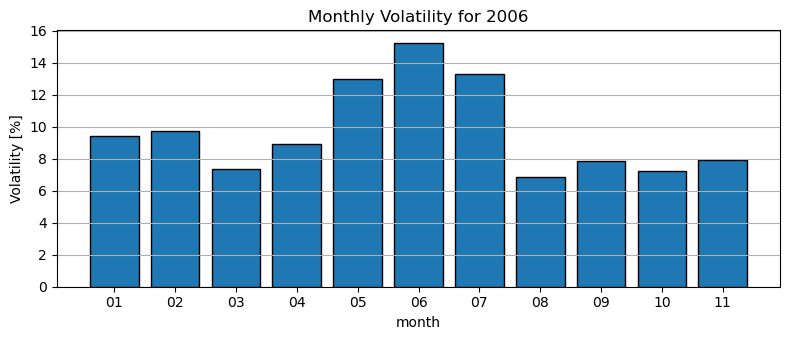

In [6]:
# Compute the returns and volatility per month
N_month = 12
month_vol = np.zeros(N_month-1,)
year = "2006"
for i in range(N_month-1):
    start_date = "".join((year, "-", str(i+1).zfill(2), "-01"))
    end_date   = "".join((year, "-", str(i+2).zfill(2), "-01"))
    values_close = sp500['Close'].loc[start_date:end_date].values.flatten()
    month_return = np.diff(values_close) / values_close[:-1]
    month_vol[i] = 100*np.std(month_return) * np.sqrt(252)  # annualized daily volatility

months = [str(i+1).zfill(2) for i in range(N_month-1)]
# Plot chart
plt.figure(figsize=(8, 3.5))
plt.bar(months, month_vol, edgecolor='black')
plt.title("".join('Monthly Volatility for ' + year))
plt.xlabel('month')
plt.ylabel('Volatility [%]')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

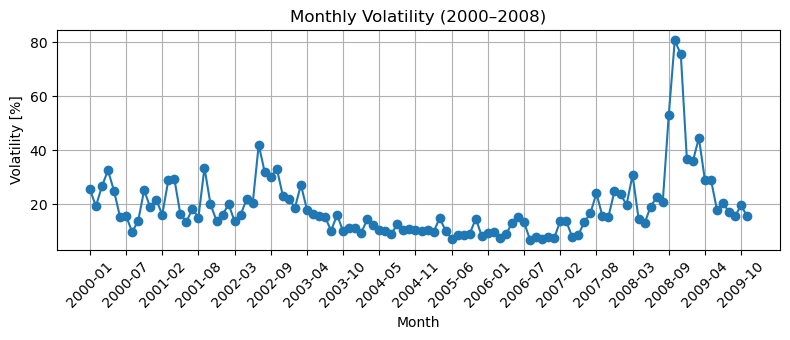

In [7]:
# Compute the returns and volatility per month
N_month = 12
N_years = 10
month_vol = []
month_labels = []
for j in range(N_years):
    year = f"200{j}"
    for i in range(N_month-1):
        start_date = f"{year}-{str(i+1).zfill(2)}-01"
        end_date   = f"{year}-{str(i+2).zfill(2)}-01"
        values_close = sp500['Close'].loc[start_date:end_date].values.flatten()
        month_return = np.diff(values_close) / values_close[:-1]
        month_vol.append(100*np.std(month_return) * np.sqrt(252))  # annualized daily volatility
        label = f"{year}-{str(i+1).zfill(2)}"
        month_labels.append(label)


plt.figure(figsize=(8, 3.5))
plt.plot(month_vol, marker='o')
plt.xticks(ticks=range(0, len(month_labels), 6), labels=month_labels[::6], rotation=45)
plt.title('Monthly Volatility (2000–2008)')
plt.xlabel('Month')
plt.ylabel('Volatility [%]')
plt.grid(True)
plt.tight_layout()
plt.show()

### ACF
A standard graphical method for exploring predictability in statistical data is the
autocorrelation function (ACF). The ACF measures how returns on one day are correlated with returns on previous days. If such correlations are statistically significant, we
have strong evidence for predictability.

### Fat tails
A random variable is said to have fat tails if it exhibits more
extreme outcomes than a normally distributed random variable with the same mean
and variance.

# Chapter 2: Univariate Volatility Forecasting

## Overview

This chapter explores models used to estimate and forecast **volatility** in financial time series. For simplicity, we assume that the **mean return is zero**—an approximation often used in daily data since the mean is typically several orders of magnitude smaller than volatility and can be ignored without significantly affecting forecasting performance.

## Volatility Estimation Models

### 1. Moving Average (MA) Model

A simple historical volatility estimate over a window $ W_E $:

$\sigma_t^2 = \frac{1}{W_E} \sum_{i = 1}^{W_E} y_{t-i}^2$

where \( y_t \) is the return at time \( t \).  
**Pros**: Simple and parameter-free  
**Cons**: Treats all past squared returns equally; fails to account for **volatility clustering**, which limits predictive power.

---

### 2. Exponentially Weighted Moving Average (EWMA)

To address MA's limitations, EWMA applies a **decay factor** $ \lambda \in (0,1) $:

$\sigma_t^2 = \frac{1 - \lambda}{\lambda (1 - \lambda^{W_E})} \sum_{i = 1}^{W_E} \lambda^i y_{t-i}^2$

A recursive form often used in practice:

$\sigma_t^2 = (1 - \lambda) y_{t-1}^2 + \lambda \sigma_{t-1}^2$

J.P. Morgan's RiskMetrics™ recommended \( \lambda = 0.94 \) for daily data, but this is not universally optimal across assets or time periods.

---

### 3. ARIMA Models

**ARIMA(p, d, q)** is a flexible class for modeling time series:

- $ p $: order of autoregression (AR)  
- $ d $: degree of differencing (integration)  
- $ q $: order of moving average (MA)  

Examples:
- **ARIMA(0, 0, 0)**: white noise  
- **ARIMA(0, 1, 0)**: random walk  
- **ARIMA(0, 1, 1)**: exponential smoothing  
- **ARIMA(0, 2, 2)**: more complex damped models  

ARIMA is more common for modeling price levels or returns directly, and less so for volatility, but is important contextually.

---

## GARCH Models and Conditional Volatility

We now turn to models explicitly built to capture **time-varying volatility**, starting with the GARCH family.

Let lowercase $ y_t $ represent observed returns, and uppercase $ Y_t $ represent the corresponding random variable with:

$Y_t = \sigma_t Z_t$

where $ Z_t \sim \mathcal{N}(0,1) $ or another distribution (e.g., Student's t).  
Conditional variance $ \sigma_t^2 $ evolves over time, unlike **unconditional volatility** $ \sigma $, which summarizes long-run variability.

---

### 4. ARCH(1)

First model to capture **volatility clustering**:

$\sigma_t^2 = \omega + \alpha Y_{t-1}^2$

- $ \omega > 0, \alpha > 0 $, with $ \alpha < 1 $ for stationarity  
- Long-run variance: $ \sigma^2 = \frac{\omega}{1 - \alpha} $

---

### 5. GARCH($L_1, L_2$)

Generalized ARCH model with autoregressive volatility:

$
\sigma_t^2 = \omega + \sum_{i=1}^{L_1} \alpha_i Y_{t-i}^2 + \sum_{j=1}^{L_2} \beta_j \sigma_{t-j}^2
$

Often simplified as:

$
\sigma_t^2 = \omega + \alpha Y_{t-1}^2 + \beta \sigma_{t-1}^2
$

**Conditions**:
- $ \alpha, \beta > 0 $
- $ \alpha + \beta < 1 $ ensures stationarity and mean-reverting volatility

**Memory** of the process can be evaluated using **half-life**:

$
n^* = 1 + \frac{\log(1/2)}{\log(\alpha + \beta)}
$

---

### 6. APARCH (Asymmetric Power ARCH)

A generalization that incorporates asymmetry and nonlinearity:

$
\sigma_{t+1}^\delta = \omega + \sum_{i=1}^{L_1} \alpha_i (|Y_{t-i}| - \zeta_i Y_{t-i})^\delta + \sum_{j=1}^{L_2} \beta_j \sigma_{t-j}^\delta
$

- Captures **leverage effects** (asymmetric response to positive/negative shocks)  
- $ \delta $: power parameter (e.g., 2 for variance, 1 for standard deviation)

Though complex, APARCH models often outperform simpler GARCH variants in out-of-sample risk forecasting (Hansen & Lunde, 2005).

---

## Model Evaluation

Model quality can be evaluated through:

- **Out-of-sample forecasting accuracy**
- **Residual diagnostics**:
  - **Jarque–Bera Test**: normality of residuals
  - **Ljung–Box Test**: autocorrelation in residuals and squared residuals

---

> In the next section, we’ll implement some of these models using Python, evaluate their fit, and begin comparing their performance across different datasets.


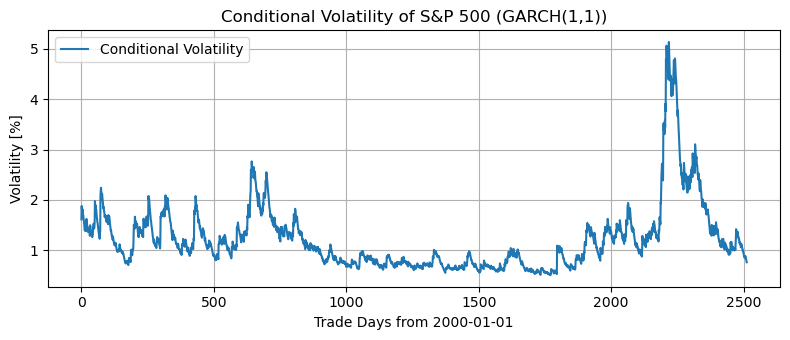

In [8]:
from arch import arch_model
# S&P returns
close_array = sp500['Close'].values.flatten()
returns = 100*np.diff(close_array) / close_array[:-1] # percentage returns

# Fit a GARCH(1,1) model to the whole period
am = arch_model(returns, vol='Garch', p=1, q=1)
res = am.fit(disp='off')  # suppress output

# Conditional volatility forecast (daily)
cond_vol = res.conditional_volatility

# Plot
plt.figure(figsize=(8, 3.5))
plt.plot(cond_vol, label='Conditional Volatility')
plt.title('Conditional Volatility of S&P 500 (GARCH(1,1))')
plt.xlabel('Trade Days from 2000-01-01')
plt.ylabel('Volatility [%]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Contrast daily vol

## Monte Carlo Simulation for Price Forecasting (not in the book)

This section explores a basic — though not optimal — approach to **Monte Carlo simulation** for forecasting asset returns. The method is intuitive and serves as an illustrative example of how simulation-based models can be built using historical volatility.

### Procedure

The Monte Carlo process is implemented as follows:

1. **Volatility Estimation**  
   Use the first 60% of available return data to fit a **GARCH(1,1)** model and estimate conditional volatility.

2. **Return Simulation**  
   Simulate the next-day return using a random draw from a **normal distribution** with zero mean and the estimated conditional standard deviation.

3. **Price Update**  
   Use the simulated return to compute the next period's price and append it to the time series.

4. **Repeat**  
   Iterate the process forward in time, updating volatility and simulating returns at each step.

---

### Key Question: Is This a Valid Monte Carlo Simulation?

At first glance, this approach resembles a Monte Carlo simulation because it generates a stochastic path based on statistical properties estimated from historical data. However, there are important limitations to consider:

#### ✅ **Monte Carlo Elements Present**:
- **Random sampling** from a known distribution
- **Iterative path generation** based on simulated returns
- **Modeling forward uncertainty**

#### ⚠️ **Limitations**:
- **Single Path Only**: A true Monte Carlo simulation typically generates many possible paths to estimate the distribution of outcomes. Simulating only one trajectory is insufficient for robust inference.
- **Parameter Reuse**: Volatility is estimated once from in-sample data and held constant (or updated mechanically), which limits realism.
- **Normality Assumption**: Asset returns are rarely normally distributed in practice. Heavy tails, skewness, and volatility clustering are better captured by using Student-t innovations or bootstrapping residuals.

---

### Conclusion

While this method demonstrates the basic idea behind Monte Carlo simulations, it is more of a **pedagogical approximation** than a fully robust implementation. For rigorous applications (e.g., Value-at-Risk, scenario testing, derivative pricing), Monte Carlo simulations should involve:

- Multiple paths (hundreds to millions)
- Stochastic volatility modeling
- Realistic innovation distributions

Still, this toy model provides a useful first step toward understanding how simulated forward returns interact with historical volatility estimates.


Forecasting: 100%|██████████| 1006/1006 [00:12<00:00, 81.36it/s]


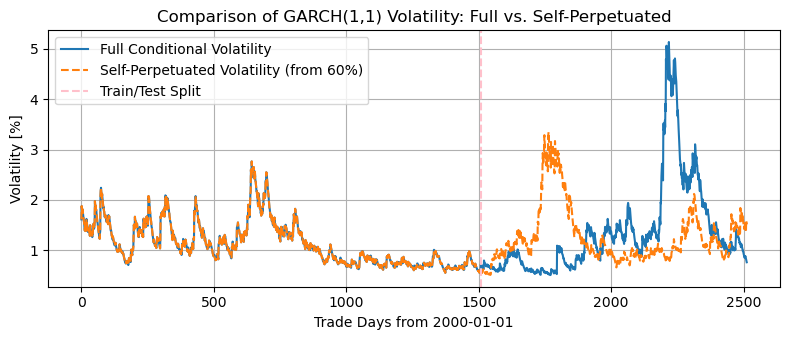

In [9]:
from tqdm import tqdm

# Compute daily returns (percentage)
close_array = sp500['Close'].values.flatten()
returns = 100 * np.diff(close_array) / close_array[:-1]

######## Full data conditional volatility ########
am_full = arch_model(returns, vol='Garch', p=1, q=1)
res_full = am_full.fit(disp='off')
cond_vol_full = res_full.conditional_volatility

######## Self-perpetuated conditional volatility ########
split_index = int(len(returns) * 0.6)
est_cond_vol = np.zeros_like(cond_vol_full)

# First 60%: use true fitted volatilities from model trained on full data (for fair comparison)
est_cond_vol[:split_index] = cond_vol_full[:split_index]

# Fit model on training set only
train_returns = returns[:split_index]
test_returns = returns[split_index:]
history = train_returns.tolist()

# Roll through each test point and forecast 1-step ahead, appending real data each time
for i in tqdm(range(len(test_returns)), desc="Forecasting"):
    am = arch_model(history, vol='Garch', p=1, q=1)
    res = am.fit(disp='off')
    
    forecast = res.forecast(horizon=1)
    tomorrow_var = forecast.variance.values[-1, 0]
    tomorrow_vol = np.sqrt(tomorrow_var)
    
    est_cond_vol[split_index + i] = tomorrow_vol

    # Append actual return to the history for next step
    # history.append(test_returns[i]) # feed real data
    history.append(np.random.normal(loc=0, scale=tomorrow_vol)) # feed guessed return

# Plot
plt.figure(figsize=(8, 3.5))
plt.plot(cond_vol_full, label='Full Conditional Volatility')
plt.plot(est_cond_vol, label='Self-Perpetuated Volatility (from 60%)', linestyle='--')
plt.axvline(x=split_index, color='pink', linestyle='--', label='Train/Test Split')
plt.title('Comparison of GARCH(1,1) Volatility: Full vs. Self-Perpetuated')
plt.xlabel('Trade Days from 2000-01-01')
plt.ylabel('Volatility [%]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Forecasting: 100%|██████████| 1006/1006 [00:12<00:00, 80.69it/s]


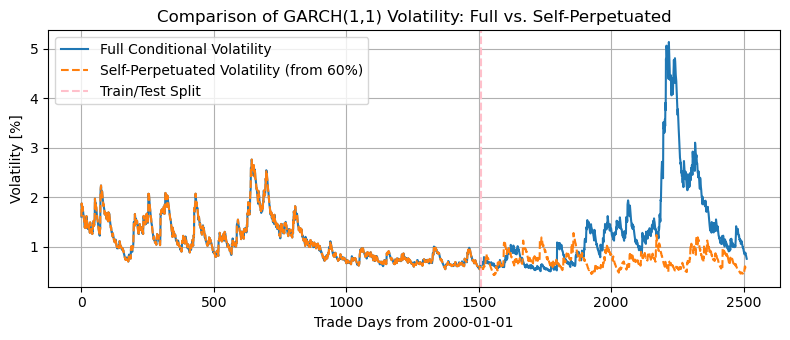

In [10]:
from tqdm import tqdm
from scipy.stats import t

df = 7  # degrees of freedom for Student-t 
        # 5 or 7 better behaved fat-tailed distribution

# Compute daily returns (percentage)
close_array = sp500['Close'].values.flatten()
returns = 100 * np.diff(close_array) / close_array[:-1]

######## Full data conditional volatility ########
am_full = arch_model(returns, vol='Garch', p=1, q=1)
res_full = am_full.fit(disp='off')
cond_vol_full = res_full.conditional_volatility

######## Self-perpetuated conditional volatility ########
split_index = int(len(returns) * 0.6)
est_cond_vol = np.zeros_like(cond_vol_full)

# First 60%: use true fitted volatilities from model trained on full data (for fair comparison)
est_cond_vol[:split_index] = cond_vol_full[:split_index]

# Fit model on training set only
train_returns = returns[:split_index]
test_returns = returns[split_index:]
history = train_returns.tolist()

# Roll through each test point and forecast 1-step ahead, appending real data each time
for i in tqdm(range(len(test_returns)), desc="Forecasting"):
    if len(history) < 50:
        est_cond_vol[split_index + i] = np.std(history)  # fallback
        sample = t.rvs(df, loc=0, scale=np.std(history))
    else:
        am = arch_model(history, vol='Garch', p=1, q=1)
        res = am.fit(disp='off')
    
        forecast = res.forecast(horizon=1)
        tomorrow_var = forecast.variance.values[-1, 0]
        tomorrow_vol = np.sqrt(tomorrow_var)
    
        est_cond_vol[split_index + i] = tomorrow_vol

        # Append actual return to the history for next step
        # history.append(test_returns[i]) # feed real data
        # Scale the t-distributed sample to match the desired volatility
        scale = tomorrow_vol / np.sqrt(df / (df - 2))
        history.append(t.rvs(df, loc=0, scale=scale))
        # sample = t.rvs(df, loc=0, scale=scale)
        # sample = np.clip(sample, -20, 20)  # returns capped to ±10%
        # history.append(float(sample))

# Plot
plt.figure(figsize=(8, 3.5))
plt.plot(cond_vol_full, label='Full Conditional Volatility')
plt.plot(est_cond_vol, label='Self-Perpetuated Volatility (from 60%; MC run)', linestyle='--')
plt.axvline(x=split_index, color='pink', linestyle='--', label='Train/Test Split')
plt.title('Comparison of GARCH(1,1) Volatility: Full vs. Self-Perpetuated')
plt.xlabel('Trade Days from 2000-01-01')
plt.ylabel('Volatility [%]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

So even though I pretending it's a forecast, I still feeding it the same returns as the full model would see eventually. Hence, the recursion and response of volatility to returns will be nearly identical.

To make a real forecan I need other model to introduce estimated tomorrow return:

history.append(test_returns[i]) # feed real data

Forecast out-of-sample without ever seeing real future returns (simulate them or keep mean=0).

#### Comments

It has been empirically noted that stock returns are sometimes negatively correlated with
changes in volatility: volatility tends to rise following bad news and fall following good
news. This is called the ‘‘leverage effect’’, as it could be explained by firms’ use of
leverage. The leverage effect is not easily detectable in stock indices and is not expected
to be significant in foreign exchange.

GARCH(1,1) model, tomorrow’s volatility is quadratic in
today’s return, and the sign of today’s return does not matter. We need to introduce
asymmetry to capture leverage effects (i.e., the impacts of negative and positive shocks
have to be different).


A straightforward way to incorporate leverage effects in the GARCH model is to use
the model of Glosten et al. (1993) (GJR-GARCH, also known as threshold-GARCH).

<Figure size 800x350 with 0 Axes>

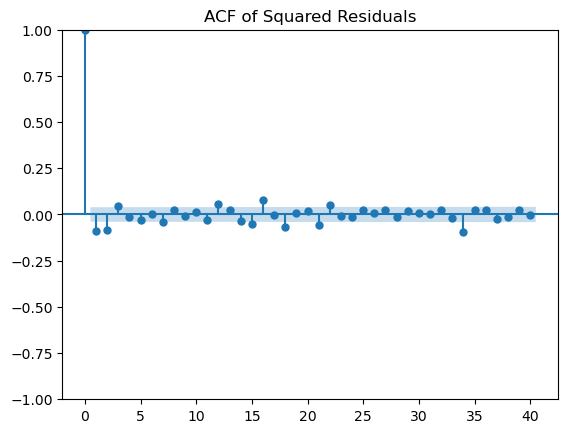

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

# Assuming returns is your 1D numpy array or list of returns
residuals = returns - np.mean(returns)  # demean if needed

# Plot ACF of squared residuals
plt.figure(figsize=(8, 3.5))
plot_acf(residuals, lags=40)
plt.title("ACF of Squared Residuals")
plt.show()

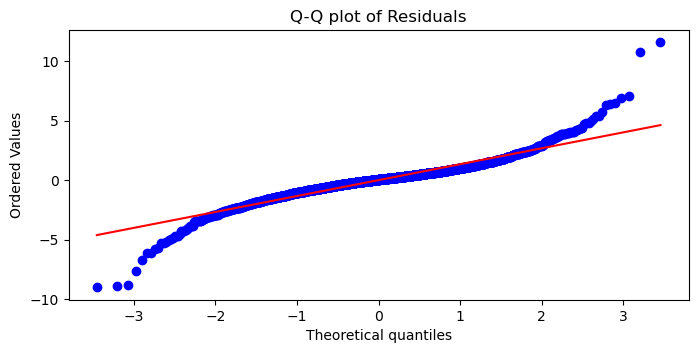

In [12]:
import scipy.stats as stats

# Suppose residuals is your array of residuals
# Example: residuals = returns - np.mean(returns)

plt.figure(figsize=(8, 3.5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot of Residuals")
plt.show()

### Stochastic volatility model

$Y_t = Z_t \sigma_t$

$\sigma_t^2 = \exp[\delta_0 +\delta_1 \log \sigma_{t-1}^2 +\delta_2\eta_t]$

Where $(Z_t,\eta_t)^T\sim\mathcal{N}(0,[1,\zeta;\zeta;1])$. $\zeta$ provides correlation between returns and volatility, giving rise to the leverage effect.

# Chapter 3 : Multivariate volatility models

Now we have many assets:

$Y_{t,k} = \sigma_{t,k}Z_{t,k}$

with conditional covariance (many variable):

${\rm Cov} (Y_{i}, Y_{j})= E[(Y_{i}-E[Y_{i}])(Y_{j}-E[Y_{j}])] $

${\rm Cov} (Y_{t,i}, Y_{t,j}) \equiv \sigma_{t,ij} = (\Sigma_t)_{ij}$

Generally the portfolio complexity grows as $N(N-1)/2+N$, where $N$ for volatility and $\sim N^2$ for the matrix above.  

### IMB & Microsoft stock covariance

In [13]:
# Download Microsoft data from 2000-01-01 to 2009-12-31
microsoft = yf.download('MSFT', start='2000-01-01', end='2009-12-31')

close_array = microsoft['Close'].values.flatten()
msft_returns = 100 * np.diff(close_array) / close_array[:-1]
msft_returns = msft_returns - np.mean(msft_returns)

# Download IBM data
ibm = yf.download('IBM', start='2000-01-01', end='2009-12-31')

close_array_ibm = ibm['Close'].values.flatten()
ibm_returns = 100 * np.diff(close_array_ibm) / close_array_ibm[:-1]
ibm_returns = ibm_returns - np.mean(ibm_returns)

# Ensure same length after diff
T = min(len(msft_returns), len(ibm_returns))
msft_returns = msft_returns[:T]
ibm_returns = ibm_returns[:T]

K = 2
y = np.zeros((K, T))
y[0, :] = msft_returns
y[1, :] = ibm_returns

# Show first few rows
print('\n MICROSOFT\n')
print(microsoft.head())
print('\n IBM\n')
print(ibm.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


 MICROSOFT

Price           Close       High        Low       Open    Volume
Ticker           MSFT       MSFT       MSFT       MSFT      MSFT
Date                                                            
2000-01-03  35.726723  36.358885  34.328304  35.975756  53228400
2000-01-04  34.519871  35.899133  34.404932  34.807217  54119000
2000-01-05  34.883827  35.669240  33.523722  34.060101  64059600
2000-01-06  33.715290  34.902988  33.217223  34.385765  54976600
2000-01-07  34.155895  34.404929  32.891572  33.293856  62013600

 IBM

Price           Close       High        Low       Open    Volume
Ticker            IBM        IBM        IBM        IBM       IBM
Date                                                            
2000-01-03  58.120468  58.120468  56.053688  56.335519  10823694
2000-01-04  56.147659  57.368942  55.552676  57.118422   8606279
2000-01-05  58.120468  59.999365  56.178947  56.586039  13318927
2000-01-06  57.118420  59.592297  56.867900  59.122573   8338607
2000-

Assuming EWMA model the conditional cov matrix elemet is

$\sigma_{t,ij} = \lambda \sigma_{t-1,ij} + (1-\lambda) y_{t-1,i}y_{t-1,j},\qquad \lambda = 0.94$

$\Sigma_1$ is usually set as the unconditional volatility of the data and some 30 days of data are used to update the volatility forecast before it is used. This is sometimes called burn time, and takes into account the error induced into the model by setting the value of $\Sigma_1$  to an arbitrary value.

function cov for ($y_1,y_2$) is

$cov(y) = [Var(y_1), Cov(y_1,y_2);Cov(y_1,y_2),Var(y_2)]$

$[R]_{ij} = [Corr(y)]_{ij} = \frac{Cov(y_i,y_j)}{\sqrt{Var(y_i)Var(y_j)}}$

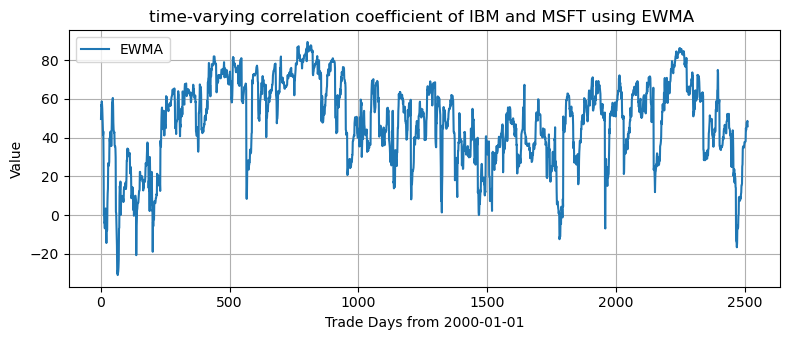

In [14]:
EWMA = np.zeros((T, 3))

lam = 0.94
S = np.cov(y)
R = np.corrcoef(y)  
# Initialize EWMA storage: T rows, 3 columns (var1, var2, cov12)
EWMA[0, :] = [S[0, 0], S[1, 1], S[0, 1]] 
for i in range(T-1):
    S = lam * S + (1 - lam) * np.outer(y[:, i],y[:, i])  # outer product
    EWMA[i+1, :] = [S[0, 0], S[1, 1], S[0, 1]]
# time-varying correlation coefficient from the variances and covariances
EWMArho = 100*EWMA[:, 2] / np.sqrt(EWMA[:, 0] * EWMA[:, 1])

# Plot
plt.figure(figsize=(8, 3.5))
plt.plot(EWMArho , label='EWMA', linestyle='-')
plt.title('time-varying correlation coefficient of IBM and MSFT using EWMA ')
plt.xlabel('Trade Days from 2000-01-01')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The reason one needs to estimate the entire conditional covariance matrix of returns
in one go is that the correlations are not zero. The orthogonal approach addresses this
problem by linearly transforming the observed returns matrix into a set of portfolios
with the key property that they are uncorrelated, implying we can forecast their
volatilities separately. This makes use of principal components analysis (PCA).

This approach is known as orthogonal GARCH, or OGARCH, because it involves
transforming correlated returns into uncorrelated portfolios and then using GARCH to
forecast the volatilities of each uncorrelated portfolio separately. 

Essentially we diagonalise the matrix and run GARCHfor it's eigenvalues. $Q$ is a matrix of eigenvectors of $R = Q \Lambda Q^T$. The first step in the OGARCH approach is to transform the return matrix y into uncorrelated portfolios u:

$\mathbf{u} = \Lambda \mathbf{y},~~Cov(\mathbf{u}_i)\sim {\rm diag}$

u has the same dimensions as y and possesses the property that different rows are
uncorrelated so we can run a univariate GARCH or a similar model on each row in
u separately to obtain its conditional variance forecast, denoted by $D_t$:

$\Sigma_t = \Lambda D_t \Lambda'$

Note, single $\Lambda$ and assumption that correlation is not reoccuring.

At start The highest eigenvalue corresponds to the most important principle component—the one that
explains most of the variation in the data.

##### CCC model

$\Lambda = D_t = {\rm diag}[\sigma_{t,1},\ldots,\sigma_{t,K}]$

##### DCC model

dynamical 

$R_t = Q'_t Q_t,\qquad Q_t = (1-\zeta-\eta)cov(Y)+\zeta Y'_{t-1}Y_{t-1}+\eta Q_{t-1}$

but parameters are constant

### BEKK($L_1,L_2,K$) model

$\Sigma_t = \Omega \Omega'+ \sum_{k=1}^K \sum_{i=1}^{L_1} A'_{i,k}Y'_{t-i}Y_{t-i}A_{i,k}+\sum_{k=1}^K \sum_{i=1}^{L_2} B'_{j,k}\Sigma_{t-j}B_{j,k}$

Summary: One advantage of the OGARCH approach is that it is well suited to large-scale
problems, such as obtaining the covariance matrix for an entire financial institution.
This is because we can use a principal components analysis (PCA) approach to build up
the covariance matrix iteratively, like a house of Lego blocks, and use the first principal
components (PCs) to join them up. However, it would be straightforward to combine a
PCA approach with other methods. For example, one could use DCC for a desk with
many assets and BEKK for a smaller desk whose assets have complicated interactions,
and finally use PCA to create a combined covariance matrix.

# Chapter 4: Risk measures

Risk = the chance of losing part or all of an investment

The most common measures of risk: volatility, value-at-risk (VaR) and expected shortfall (ES).

Volatility, or the standard deviation of returns, is the main measure of risk in most financial analysis. It is sufficient as a risk measure only when financial returns are normally distributed. Which usually is not the case. Volatility is likely to systematically underestimate
risk.

### VALUE-AT-RISK

The most common risk measure after volatility is value-at-risk (VaR). It is distribution independent and it is a measure of losses as a result of ‘‘typical’’ market movements.

Definition: The loss on a trading portfolio such that there is a
probability $p$ of losses equaling or exceeding VaR in a given trading period and a $1-p$ probability of losses being lower than the VaR.

Cut-off value, no info what will happen below.

Profit/Loss $P/L = Q = \theta Y =\theta (Y_t - Y_{t-T}) ;~ Pr[Q\leq -{\rm VaR(p)}] =p$

$Pr[Q\leq -|x|]$ - probability losing more (or equal) then x.

${\rm VaR}_p = {\rm inf}\{x: {\rm Pr}[Q\leq -|x|] \geq p\}$ - Find the smallest value x such that the probability of the loss being greater than or equal to x is at least p. You want the worst-case loss that happens with at least probability p.

$\rm Pr[L > VaR_p] = 1-p,\qquad Pr[Q\leq - VaR(p)]=p = \int_{-\infty}^{-\rm VaR_p}f_q(x)dx$

So VaR is the threshold (in absolute value) such that you’re guaranteed, with confidence level p, that losses will not exceed that threshold more often than p.

There’s only a p chance that your portfolio will lose more than $VaR in a given time frame.

${\rm VaR}_p$ is the smallest threshold x such that the probability of your loss being less than or equal to x is at least p. Or, equivalently, there is a probability 1-p that you will lose more than VaR.

VaR is not about the actual worst-case loss — it’s about setting a threshold so that: Exceeding that threshold happens only with small probability 1-p.

Notes: Return $Y_t$ is in percents, the velue has to be reconstructed. infimum is the greatest lower bound. CDF = Cumulative Distribution Function

Example: The commodities’ trading book is worth £1 billion and daily
VaR$_{1\%}$ = £10 million. This means we expect to lose £10 million or more once every 100 days.

More Notes:

A. Probability of losses exceeding VaR, p, needs to be specified, with the most common probability level being 1$\%$. Theory
provides little guidance about the choice of p; it is mainly determined by how the user of
the risk management system wishes to interpret the VaR number. Is a ‘‘large’’ loss one
that occurs with a probability of 1$\%$ or 5$\%$ or even 0.1$\%$?

B. The second step is the holding period (i.e., the time period over which losses may
occur). This is usually one day.

C. The third and final step is identification of the probability distribution of the profit and
loss of the portfolio. This is the most difficult and important aspect of risk modeling.
The standard practice is to estimate the distribution by using past observations and a
statistical model.

D. Over time the mean return grows at rate T while the volatility grows at rate $\sqrt{T}$. This means that as the
holding period increases eventually the mean will become so large as to make the VaR
switch signs. Since this can happen for very long holding periods, the usefulness of VaR as a risk
measure for annual, even quarterly, holding periods is very much in doubt.

ISSUES:

A. VaR is only a quantile on the P/L distribution.

VaR gives the ‘‘best of worst case scenarios’’ and, as
such, it inevitably underestimates the potential losses associated with a probability level.

B. VaR is not a coherent risk measure.

C. VaR is easy to manipulate.

VaR is not coherent. Coherent means:

1. Monotonicity $X\leq Y: \phi(X)\geq \phi(Y)$

2. Subadditivity $\phi(X+Y)\leq \phi(X) + \phi(Y)$ [VaR can break this, if accets are super fat tailed]

3. Positive homogeneity $\phi(cX) = c\phi(X)$

4. Translation invariance $\phi(X+c) = \phi(X)-c$

A simple way to lower the VaR is to reduce holdings of risky assets, but it can equally
well be lowered by using simple trading strategies involving options. In this case, VaR
could be lowered at the expense of overall profitability and even by increasing downside
risk. Hence, the risk reduction implied by lower VaR is illusionary: reported risk
(VaR(p)) is reduced, but actual risk increases and profits decrease.

One example of how this could be done is provided by Danı ́elsson (2002) who
demonstrates how judicious use of put options can deliver any VaR desired.

(VaR manipulation) Suppose the VaR before any manipulation is
VaR0 and that a bank would really like the VaR to be VaR1 where
0 >$\rm VaR_1 > VaR_0$ (as in Figure 4.6). One way to achieve this is to write a put option
with a strike price below $\rm VaR_0$ and buy one with a strike above $\rm VaR_1$. The effect of this
will be to lower expected profit and increase downside risk.

### Expected Shortfall (ES)

What is expected loss when losses exceed VaR? Answer: ES

ES can distinguish between the levels of riskiness in the
manipulated and non-manipulated assets. ES is aware of the shape of the tail distribution while VaR is not.

${\rm ES = -E[Q|Q\leq -VaR(p)]}, \qquad E(x)=\int_{-\infty}^\infty x f(x) dx$

with the density

$1 = \int_{-\infty}^\infty f_{\rm VaR}(x)dx, \qquad p = \int_{-\infty}^{-\rm VaR(p)} f_{\rm VaR}(x)dx, \qquad {\rm ES} = -\int_{-\infty}^{-\rm VaR(p)} xf_{\rm VaR}(x)dx$

If $\phi$ and $\Phi$ are the normal density and distribution, then

${\rm VaR}_p = \Phi^{-1}(1-p)$ and ${\rm ES} = \frac{\phi({\rm{VaR}}_p)}{p}$.

Exersise

**Table 1.** VaR and ES for a standard normal distribution

|  *p*   | 0.5   | 0.1   | 0.05  | 0.025 | 0.01  | 0.001 |
|--------|-------|-------|--------|-------|--------|--------|
| **VaR** | 0.000 | 1.282 | 1.645  | 1.960 | 2.326  | 3.090  |
| **ES**  | 0.798 | 1.755 | 2.063  | 2.338 | 2.665  | 3.367  |

In [15]:
from scipy.stats import norm

# Define probability levels
p = np.array([0.5, 0.1, 0.05, 0.025, 0.01, 0.001])

# Compute Value at Risk (VaR)
VaR = norm.ppf(1 - p)  # inverse CDF (percent point function) for upper tail

# Compute Expected Shortfall (ES)
ES = norm.pdf(VaR) / p  # pdf at VaR divided by p

# Print results
for i in range(len(p)):
    print(f"p = {p[i]:.3f}, VaR = {VaR[i]:.3f}, ES = {ES[i]:.3f}")

p = 0.500, VaR = 0.000, ES = 0.798
p = 0.100, VaR = 1.282, ES = 1.755
p = 0.050, VaR = 1.645, ES = 2.063
p = 0.025, VaR = 1.960, ES = 2.338
p = 0.010, VaR = 2.326, ES = 2.665
p = 0.001, VaR = 3.090, ES = 3.367


Summary: The underlying distribution of financial returns is unknown and impossible to identify
accurately with current technology. This suggests that the use of distribution-free risk
measures is the best way to forecast risk in most cases.

Volatility is the appropriate risk measure as long as returns are normally distributed,
a property that rarely holds in practice.

The second most common risk measure is VaR, which often provides the best balance
between theoretical strength and feasibility of implementation. Its biggest weakness is
the lack of subadditivity. An important conclusion is that VaR is most relevant for short holding periods, especially one day.

ES is the best known subadditive risk measure and is both theoretically and
intuitively preferable to VaR. However, severe practical deficiencies prevent its widespread use in real world applications.

# Chapter 5: Implementing risk forecasts

Non-parametric method: historical simulation (HS).

By contrast, parametric methods are based on estimating the underlying distribution
of returns and then obtaining risk forecasts from the estimated distribution. For most
applications, the first step in the process is forecasting the covariance matrix, using MA,
EWMA or GARCH. They are frequently used with
the normal distribution and occasionally with the Student-t.  

### Historical simulation (HS).

Test using stocks of IBM and Microsoft

Remember: The loss on a trading portfolio such that there is a
probability $p$ of losses equaling or exceeding VaR in a given trading period. Thus, order returns and take p% worst value for VaR.

ES is calculated by taking the mean of all observations equal to or more
negative than -VaR.

A minimum of 10
observations are recommended to calculate ES with HS. General recommended sample size for HS is 3/p.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MSFT daily VaR = 62.831 $
MSFT ES = 87.140 $
IBM daily VaR = 53.598 $
IBM ES = 67.334 $
portfolio daily VaR = 56.368 $
portfolio ES = 73.276 $


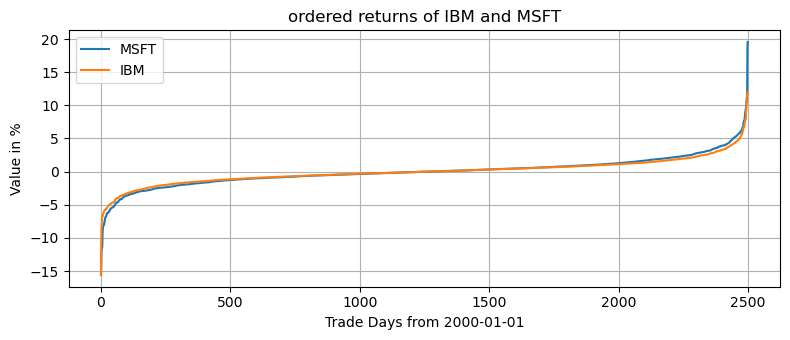

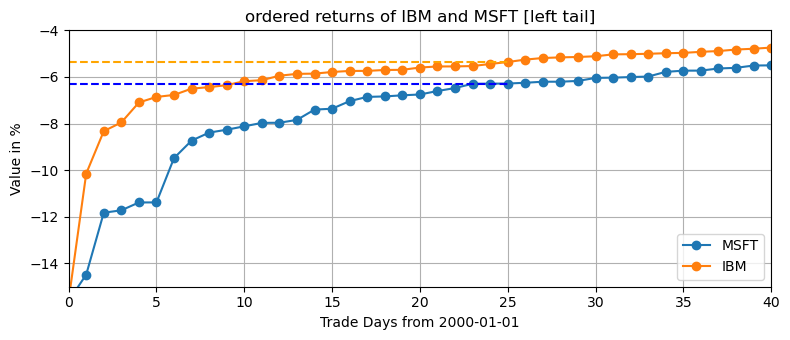

In [16]:
# Download Microsoft data from 2000-01-01 to 2009-12-31
microsoft = yf.download('MSFT', start='2000-01-01', end='2009-12-31')

close_array = microsoft['Close'].values.flatten()
msft_returns = np.diff(close_array) / close_array[:-1]
msft_returns = msft_returns - np.mean(msft_returns)

# Download IBM data
ibm = yf.download('IBM', start='2000-01-01', end='2009-12-31')

close_array_ibm = ibm['Close'].values.flatten()
ibm_returns = np.diff(close_array_ibm) / close_array_ibm[:-1]
ibm_returns = ibm_returns - np.mean(ibm_returns)

# Ensure same length is multiple of 100 for VaR 
T = int(100*np.fix(len(msft_returns)/100))
n_discarded = len(msft_returns) - int(100*np.fix(len(msft_returns)/100))
K = 2
# returns
y = np.zeros((int(100*np.fix(len(msft_returns)/100)), K))
y[:, 0] = msft_returns[n_discarded:]
y[:, 1] = ibm_returns[n_discarded:]
# sorted returns
y_sorted = np.zeros((int(100*np.fix(len(msft_returns)/100)), K))
y_sorted[:, 0] = np.sort(msft_returns[n_discarded:])
y_sorted[:, 1] = np.sort(ibm_returns[n_discarded:])

value = 1000   # portfolio value in usd 
p = 0.01       # VaR parameter
w = [0.3, 0.7] # portfolio weights

index = int((p) * len(y[:, 0]))
VaR_msft = -value*y_sorted[index, 0]
ES_msft = -value*np.mean(y_sorted[:index, 0])
VaR_ibm = -value*y_sorted[index, 1]
ES_ibm = -value*np.mean(y_sorted[:index, 1])
VaR_port = -value*np.dot(w, y_sorted[index, :])
ES_port = -value*np.dot(w, np.mean(y_sorted[:index, :], axis=0))

print(f"MSFT daily VaR = {VaR_msft:.3f} $")
print(f"MSFT ES = {ES_msft:.3f} $")
print(f"IBM daily VaR = {VaR_ibm:.3f} $")
print(f"IBM ES = {ES_ibm:.3f} $")
print(f"portfolio daily VaR = {VaR_port:.3f} $")
print(f"portfolio ES = {ES_port:.3f} $")
# Plot
plt.figure(figsize=(8, 3.5))
plt.plot(100*y_sorted[:, 0] , label='MSFT', linestyle='-')
plt.plot(100*y_sorted[:, 1] , label='IBM', linestyle='-')
plt.title('ordered returns of IBM and MSFT')
plt.xlabel('Trade Days from 2000-01-01')
plt.ylabel('Value in %')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 3.5))
plt.plot(100*y_sorted[:, 0] , label='MSFT', linestyle='-', marker='o')
plt.plot(100*y_sorted[:, 1] , label='IBM', linestyle='-', marker='o')
ind = int((0.01) * len(y[:, 0]))
plt.plot([0, ind], [100*y_sorted[ind,0], 100*y_sorted[ind,0]] , linestyle='--', color='blue')
plt.plot([0, ind], [100*y_sorted[ind,1], 100*y_sorted[ind,1]] , linestyle='--', color='orange')
plt.title('ordered returns of IBM and MSFT [left tail]')
plt.xlabel('Trade Days from 2000-01-01')
plt.ylabel('Value in %')
plt.grid(True)
plt.legend()
plt.xlim(right=40)
plt.xlim(left=0)
plt.ylim(top=-4)
plt.ylim(bottom=-15)
plt.tight_layout()
plt.show()


Historical simulation (HS) is a simple method for forecasting risk and relies on the
assumption that history repeats itself, where one of the observed past returns is expected
to be the next period return.

HS tends to perform better than alternative methods. It is
less sensitive to the odd outlier and does not incorporate estimation error in the same
way as parametric methods. The advantages of HS become especially clear when working with portfolios because it directly captures nonlinear dependence in a way that other
methods cannot.

The VaR at probability p is simply the negative ($T\times p$)th value in the sorted return
vector multiplied by the monetary value of the portfolio.

To compute the Value at Risk (VaR) at confidence level p, sort the vector of historical returns. The VaR is then the negative of the return at the (1−p)-quantile, multiplied by the portfolio value.

### Parametric methods
 
Interestingly, for 

$R_t = \frac{P_t-P_{t-1}}{P_{t-1}}$

VaR is then obtained from:
\begin{align*}
p &= \Pr(P_t - P_{t-1} \leq -\text{VaR}(p)) \\
  &= \Pr(P_{t-1} R_t \leq -\text{VaR}(p)) \\
  &= \Pr\left(\frac{R_t}{\sigma} \leq -\frac{\text{VaR}(p)}{P_{t-1} \sigma} \right).
\end{align*}

Let us denote the distribution of standardized returns $ (R_t/\sigma) $ by $ F_R(\cdot)$  and the inverse distribution by $ F_R^{-1}(p)$. Then it follows that the VaR for holding one unit of the asset is:

$\text{VaR}(p) = -\sigma F_R^{-1}(p) P_{t-1}.$

We can parametrically estimate VaR for sigma. Assume normal distribution. 

#### EWMA

In [37]:
WE = 20
T = 2500
prediction_window = 5 
for t in range(T-prediction_window,T):
    t1 = t-WE
    window = y[t1:t,0] # for the msft
    sigma = np.std(window);
    VaR = -sigma * norm.ppf(p) * value # norm.ppf(p) = norminv(p)
    print(f"day {t:.0f} MSFT next day VaR estimation = {VaR:.3f} $")

day 2495 MSFT next day VaR estimation = 24.295 $
day 2496 MSFT next day VaR estimation = 24.272 $
day 2497 MSFT next day VaR estimation = 24.081 $
day 2498 MSFT next day VaR estimation = 21.295 $
day 2499 MSFT next day VaR estimation = 21.320 $


In [38]:
lam = 0.94
s_msft = np.var(y[:30,0])
for i in range(2, T):
    s_msft = lam*s_msft + (1-lam)*y[i-1,0]**2
VaRu = - np.sqrt(s_msft) * norm.ppf(p) * value
print(f"The univariate EWMA VaR for MSFT is = {VaRu:.3f} $")

The univariate EWMA VaR for MSFT is = 24.815 $


In [57]:
# Multiasset
lam = 0.94
s = np.cov(y.T)
for i in tqdm(range(2, T), desc="Computing"):
    s = lam*s + (1-lam) * np.outer(y[i-1, :], y[i-1, :])
sigma = np.sqrt(np.conj(w).T @ s @ w)
VaRu = - sigma * norm.ppf(p) * value
print(f"The univariate EWMA VaR for the portfolio is = {VaRu:.3f} $")

Computing: 100%|██████████| 2498/2498 [00:00<00:00, 259945.70it/s]

The univariate EWMA VaR for the portfolio is = 17.925 $


In [71]:
######## Full data conditional volatility using GARCH ########
am_full = arch_model(100*y[:, 0], vol='Garch', p=1, q=1, mean='Constant')
res_full = am_full.fit(disp='off')
forecast = res_full.forecast(horizon=1)
sigma_next = np.sqrt(forecast.variance.values[-1, 0])
VaRm = - sigma_next * norm.ppf(p) * value /100
print(f"The tomorrow GARCH11 MSFT VaR is = {VaRm:.3f} $")

The tomorrow GARCH11 MSFT VaR is = 28.989 $


## MC VaR

1. **Compute the initial portfolio value:**

   $$
   \vartheta_t = x^b P_t
   $$

2. **Simulate** $S$ **one-day returns**, $y_{t+1,i}$, from:

   $$
   N(0, \sigma^2), \quad i = 1, \ldots, S
   $$

3. **Calculate the one-day future price by:**

   $$
   P_{t+1,i} = P_t e^{r(1/365)} \cdot e^{y_{t+1,i}} \cdot e^{-0.5\sigma^2}, \quad i = 1, \ldots, S
   $$

   $P_{t+1,i}$ is the $i$th simulated value. The last term is the log-normal correction from (7.2).

4. **Calculate the simulated futures value of the portfolio by:**

   $$
   \vartheta_{t+1,i} = x^b P_{t+1,i}
   $$

5. **The** $i$ **th simulated profit and loss value is then:**

   $$
   q_{t+1,i} = \vartheta_{t+1,i} - \vartheta_t
   $$

6. **VaR can be obtained directly from the vector of simulated P/L**, $\{q_{t+1,i}\}_{i=1}^{S}$.  
   For example, $\text{VaR}(0.01)$ is the 1% smallest value.



In [2]:
# Set random seed for reproducibility
np.random.seed(0)

# Parameters
S = int(1e7)         # number of simulations
s2 = 0.01 ** 2       # daily variance
p = 0.01             # VaR confidence level
r = 0.05             # risk-free rate
P = 100              # today's price

# Simulate returns
ysim = np.random.randn(S) * np.sqrt(s2) + r / 365 - 0.5 * s2

# Simulated future prices
Psim = P * np.exp(ysim)

# Simulated profit/loss
q = np.sort(Psim - P)

# 1% Value at Risk
VaR1 = -q[int(S * p)]

print(f"1% VaR: {VaR1:.4f}")

1% VaR: 2.2908
